This Experiment is a CNN Cats & Dogs -classification.I downloaded the dataset from kaggle website.The dataset contains a set of images of cats and dogs.

<h4>Importing libraries<h4>

In [1]:
import os
import shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

### Here, I Will Creating Training, Validation, and Testing Directories

In [2]:
# Download the dataset from this link:  kaggle.com/datasets/ruhul77/cats-and-dogs-dataset
dataset_dir = './dataset/training_data_kaggle/'
train_dir = os.path.join(dataset_dir, 'train')      # join to 'train' folder  directory os.mkdir(train_dir)

valid_dir = os.path.join(dataset_dir, 'valid')      # join to 'valid' folder directory os.mkdir(valid_dir)

test_dir = os.path.join(dataset_dir, 'test')        #  join to 'test' folder directory os.mkdir(test_dir)


#### Creating Training Cat and Dog Directories

In [3]:
train_cat_dir = os.path.join(train_dir, 'cats') # os.mkdir(train_cat_dir)

train_dog_dir = os.path.join(train_dir, 'dogs')  # os.mkdir(train_dog_dir) 

#### Creating Validation Cat and Dog Directories

In [4]:
valid_cat_dir = os.path.join(valid_dir, 'cats')  # os.mkdir(valid_cat_dir)

valid_dog_dir = os.path.join(valid_dir, 'dogs')  # os.mkdir(valid_dog_dir)

#### Creating Testing Cat and Dog Directories

In [5]:
test_cat_dir = os.path.join(test_dir, 'cats') # os.mkdir(test_cat_dir)

test_dog_dir = os.path.join(test_dir, 'dogs') # os.mkdir(test_dog_dir)


### Distribution of Images from dataset

#### Train Cats

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(4000)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)

#### Valid Cats

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(4000, 5250)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(valid_cat_dir, fname)
    shutil.copyfile(src, dst)

#### Test Cats

In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(5250, 6500)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)

#### Train Dog

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(4000)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)

#### Valid Dog

In [10]:
fnames = ['dog.{}.jpg'.format(i) for i in range(4000, 5250)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(valid_dog_dir, fname)
    shutil.copyfile(src, dst)

#### Test Dog

In [11]:
fnames = ['dog.{}.jpg'.format(i) for i in range(5250, 6500)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)

#### Number of Images in Each Training Split

In [12]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))

print('total validation cat images:', len(os.listdir(valid_cat_dir)))
print('total validation dog images:', len(os.listdir(valid_dog_dir)))

print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))

total training cat images: 4000
total training dog images: 4000
total validation cat images: 1250
total validation dog images: 1250
total test cat images: 1250
total test dog images: 1250


### Building a Network

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',\
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Configuring the Model for Training

In [15]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.RMSprop(lr=1e-4),\
             metrics=['acc'])

C:\Users\Tanis\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Data Preprocessing

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_dir,\
                                                    target_size=(150, 150),\
                                                    batch_size=20,\
                                                    class_mode='binary')

Found 8000 images belonging to 2 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(valid_dir,\
                                                        target_size=(150, 150),\
                                                        batch_size=20,\
                                                        class_mode='binary')

Found 2500 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### Fitting the Model Using a Batch Generator

In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\Tanis\AppData\Local\Temp\ipykernel_9320\2185313505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
100/100 [==============================] - 206s 2s/step - loss: 0.6893 - acc: 0.5350 - val_loss: 0.6869 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 124s 1s/step - loss: 0.6650 - acc: 0.6005 - val_loss: 0.6344 - val_acc: 0.6450
Epoch 3/10
100/100 [==============================] - 125s 1s/step - loss: 0.6368 - acc: 0.6430 - val_loss: 0.5964 - val_acc: 0.6900
Epoch 4/10
100/100 [==============================] - 111s 1s/step - loss: 0.6121 - acc: 0.6605 - val_loss: 0.6115 - val_acc: 0.6530
Epoch 5/10
100/100 [==============================] - 120s 1s/step - loss: 0.5902 - acc: 0.6825 - val_loss: 0.5937 - val_acc: 0.6750
Epoch 6/10
100/100 [==============================] - 118s 1s/step - loss: 0.5747 - acc: 0.6955 - val_loss: 0.5878 - val_acc: 0.7000
Epoch 7/10
100/100 [==============================] - 118s 1s/step - loss: 0.5548 - acc: 0.7130 - val_loss: 0.5438 - val_acc: 0.7160
Epoch 8/10
100/100 [==============================] - 118s 1s/step - 

In [21]:
import matplotlib.pyplot as plt

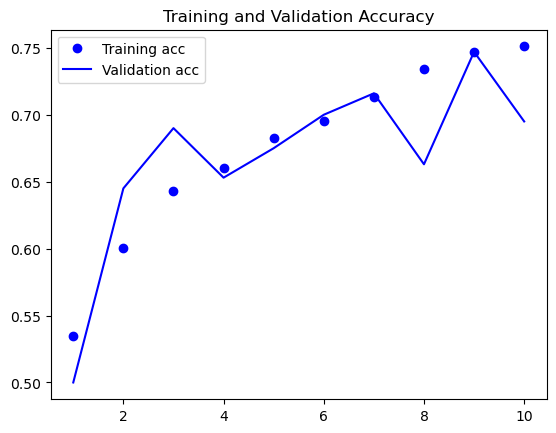

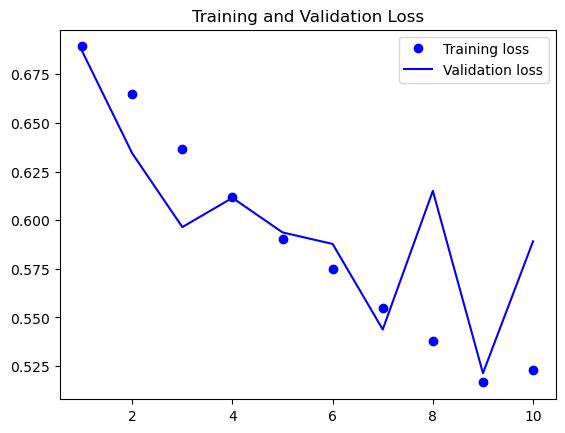

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Using Data Augmentation

In [23]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [24]:
from keras_preprocessing import image

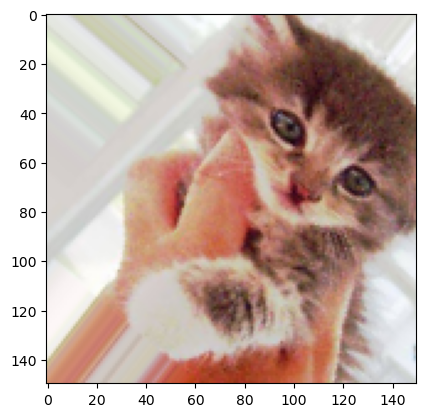

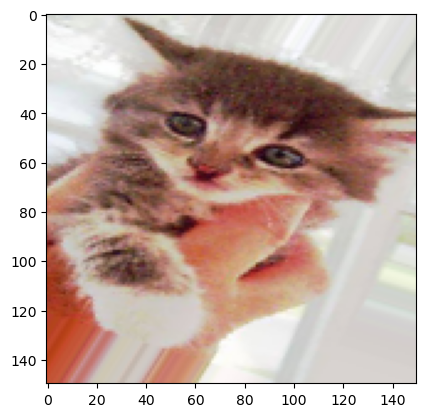

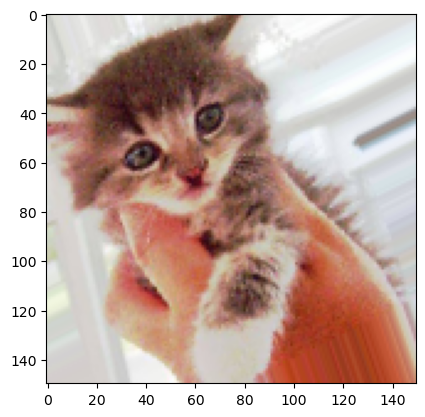

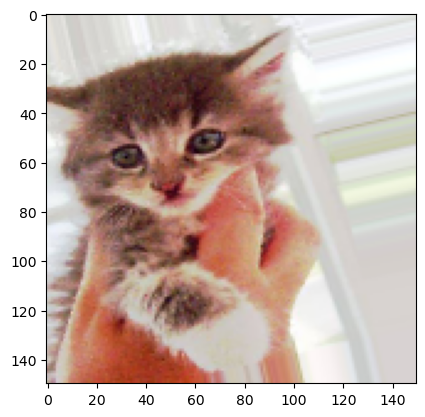

In [25]:
fnames = [os.path.join(train_cat_dir, fname) for
    fname in os.listdir(train_cat_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',\
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',\
              optimizer=optimizers.RMSprop(lr=1e-4),\
              metrics=['acc'])

C:\Users\Tanis\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 8000 images belonging to 2 classes.


In [30]:
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2500 images belonging to 2 classes.


In [31]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\Tanis\AppData\Local\Temp\ipykernel_9320\2185313505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
100/100 [==============================] - 200s 2s/step - loss: 0.6950 - acc: 0.5050 - val_loss: 0.6884 - val_acc: 0.5900
Epoch 2/10
100/100 [==============================] - 185s 2s/step - loss: 0.6861 - acc: 0.5397 - val_loss: 0.6668 - val_acc: 0.6075
Epoch 3/10
100/100 [==============================] - 198s 2s/step - loss: 0.6712 - acc: 0.5834 - val_loss: 0.6962 - val_acc: 0.5450
Epoch 4/10
100/100 [==============================] - 200s 2s/step - loss: 0.6620 - acc: 0.5991 - val_loss: 0.6392 - val_acc: 0.6175
Epoch 5/10
100/100 [==============================] - 201s 2s/step - loss: 0.6405 - acc: 0.6316 - val_loss: 0.6425 - val_acc: 0.6325
Epoch 6/10
100/100 [==============================] - 192s 2s/step - loss: 0.6329 - acc: 0.6428 - val_loss: 0.5994 - val_acc: 0.6756
Epoch 7/10
100/100 [==============================] - 193s 2s/step - loss: 0.6274 - acc: 0.6431 - val_loss: 0.5893 - val_acc: 0.6800
Epoch 8/10
100/100 [==============================] - 194s 2s/step - 

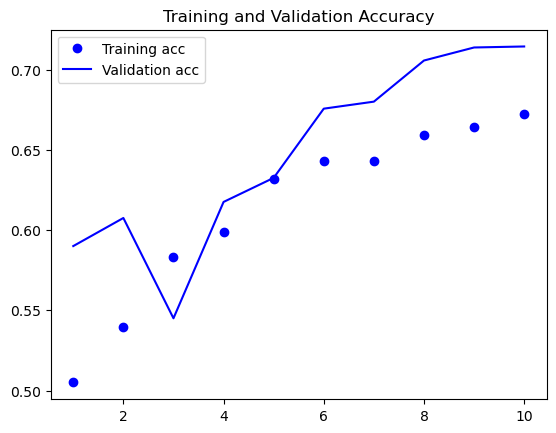

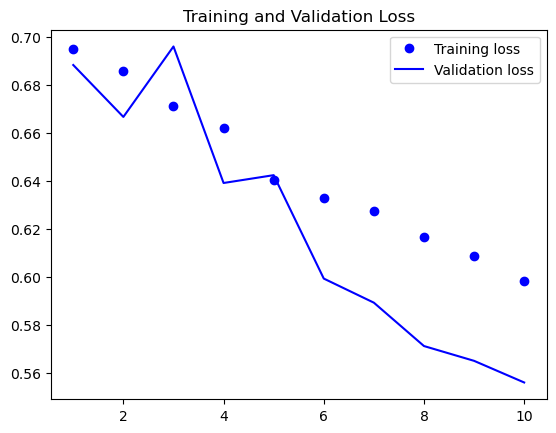

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()